<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[Decision tree](#dtree)**
2. **[Random forest](#rf)**

**Import the required libraries**

In [99]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image

In [198]:
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix

#### Load the csv file

In [100]:
df = pd.read_csv('emp_attrition.csv')

### Let's begin with some hands-on practice exercises

<a id="dtree"> </a>
## 1. Decision tree

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Write a code to detect the outliers in the dataset. Remove the outliers using IQR method, if present.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'DistanceFromHome'),
  Text(3, 0, 'EnvironmentSatisfaction'),
  Text(4, 0, 'JobInvolvement'),
  Text(5, 0, 'JobLevel'),
  Text(6, 0, 'JobSatisfaction'),
  Text(7, 0, 'MonthlyIncome'),
  Text(8, 0, 'NumCompaniesWorked'),
  Text(9, 0, 'PercentSalaryHike'),
  Text(10, 0, 'PerformanceRating'),
  Text(11, 0, 'YearsAtCompany')])

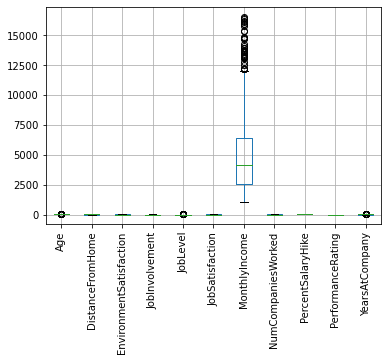

In [102]:
df.boxplot()
plt.xticks(rotation = 90)

In [43]:
# age,jobLevel,monthlyIncome,yearsatcompany

In [103]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3-q1
UL = q3+1.5*IQR
LL = q1-1.5*IQR
df = df[~((df > UL) | (df < LL)).any(axis=1)]
df = df.reset_index(drop=True)
df.shape

(1487, 18)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'DistanceFromHome'),
  Text(3, 0, 'EnvironmentSatisfaction'),
  Text(4, 0, 'JobInvolvement'),
  Text(5, 0, 'JobLevel'),
  Text(6, 0, 'JobSatisfaction'),
  Text(7, 0, 'MonthlyIncome'),
  Text(8, 0, 'NumCompaniesWorked'),
  Text(9, 0, 'PercentSalaryHike'),
  Text(10, 0, 'PerformanceRating'),
  Text(11, 0, 'YearsAtCompany')])

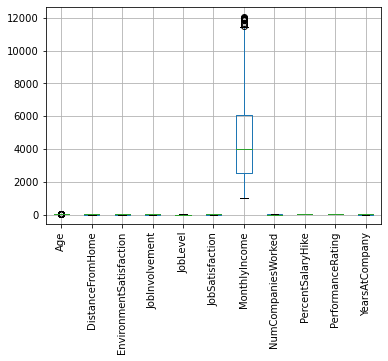

In [105]:
df.boxplot()
plt.xticks(rotation =90)

In [95]:
df['Age'] = df['Age'].fillna(df['Age'].mean(),inplace=True)

In [64]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True)

In [110]:
df['Attrition'] = df['Attrition'].replace(to_replace=['Yes','No'], value = [1,0])

In [107]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
EducationField             0
EnvironmentSatisfaction    0
Gender                     0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
NumCompaniesWorked         0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
YearsAtCompany             0
dtype: int64

In [111]:
df_num = df.select_dtypes(exclude = 'object')
df_cat = df.select_dtypes(include = 'object')

In [112]:
df_num.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'YearsAtCompany'],
      dtype='object')

In [113]:
df_cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'OverTime'],
      dtype='object')

In [114]:
df_cat_enc = pd.get_dummies(df_cat,drop_first=True)

In [115]:
df_fin = pd.concat([df_num,df_cat_enc],axis =1)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a model to predict whether or not an employee will leave the company based on employee's environment satisfaction and monthly income. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [158]:
x = df_fin[['EnvironmentSatisfaction','MonthlyIncome']]
y = df_fin[['Attrition']]

In [159]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [160]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [184]:
LR.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=i

In [185]:
accuracy_score(y_test,lr_pred)

0.7080536912751678

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Build a full model to predict if an employee will leave the company. Find three features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [35]:
df_fin.head(2)

,Age,Attrition,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,OverTime_Yes
0,33.000000,1,3,1,3,1.000000,1,3348.000000,1,11,3,10.000000,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1,32.000000,1,4,4,1,3.000000,4,10400.000000,1,11,3,14.000000,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [186]:
x = df_fin.drop('Attrition',axis =1)
y = df_fin['Attrition']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [188]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [189]:
lr_pred = LR.predict(X_test)

In [190]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       160
           1       0.71      0.62      0.66       138

    accuracy                           0.71       298
   macro avg       0.71      0.70      0.70       298
weighted avg       0.71      0.71      0.71       298



In [191]:
pd.DataFrame(LR.coef_)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,-0.033045,0.037124,-0.393700,-0.492046,-0.129780,-0.164588,-0.000076,0.088458,0.036605,0.742456,-0.015811,0.522292,0.086825,-0.394160,0.544916,-0.056610,0.216031,-0.155499,-0.004433,0.199766,0.171678,0.096729,0.042934,-0.004704,-0.088784,-0.019698,-0.102068,0.199322,0.345594,1.219617


In [192]:
# important features
imp = pd.DataFrame(LR.coef_,columns = [X_train.columns],index = ['cf_values']).T

In [193]:
imp.sort_values(by = 'cf_values',ascending=False).head(3)

,cf_values
OverTime_Yes,1.219617
PerformanceRating,0.742456
Department_Sales,0.544916


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.  Find the area under the receiver operating characteristic curve for full model built in question 3. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [197]:
# type your code here
roc_auc_score(y_test,lr_pred)

0.7022192028985508

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Plot a confusion matrix for the full model built in Q3.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [199]:
# type your code here
# confusion matrix for full model
cm = confusion_matrix(y_test,lr_pred)

In [200]:
cm

array([[125,  35],
       [ 52,  86]], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [201]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [202]:
precision = TP / (TP+FP)  # truly positive or correct classified
precision

0.7107438016528925

In [203]:
recall = TP / (TP+FN)
recall

0.6231884057971014

In [204]:
specificity = TN / (TN+FP)
specificity

0.78125

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build and plot a decision tree with maximum 5 terminal nodes.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [209]:
from sklearn.tree import DecisionTreeClassifier

In [211]:
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)
dt_pred = DT.predict(X_test)

In [213]:
dt_pred

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=i

In [225]:
from sklearn import tree

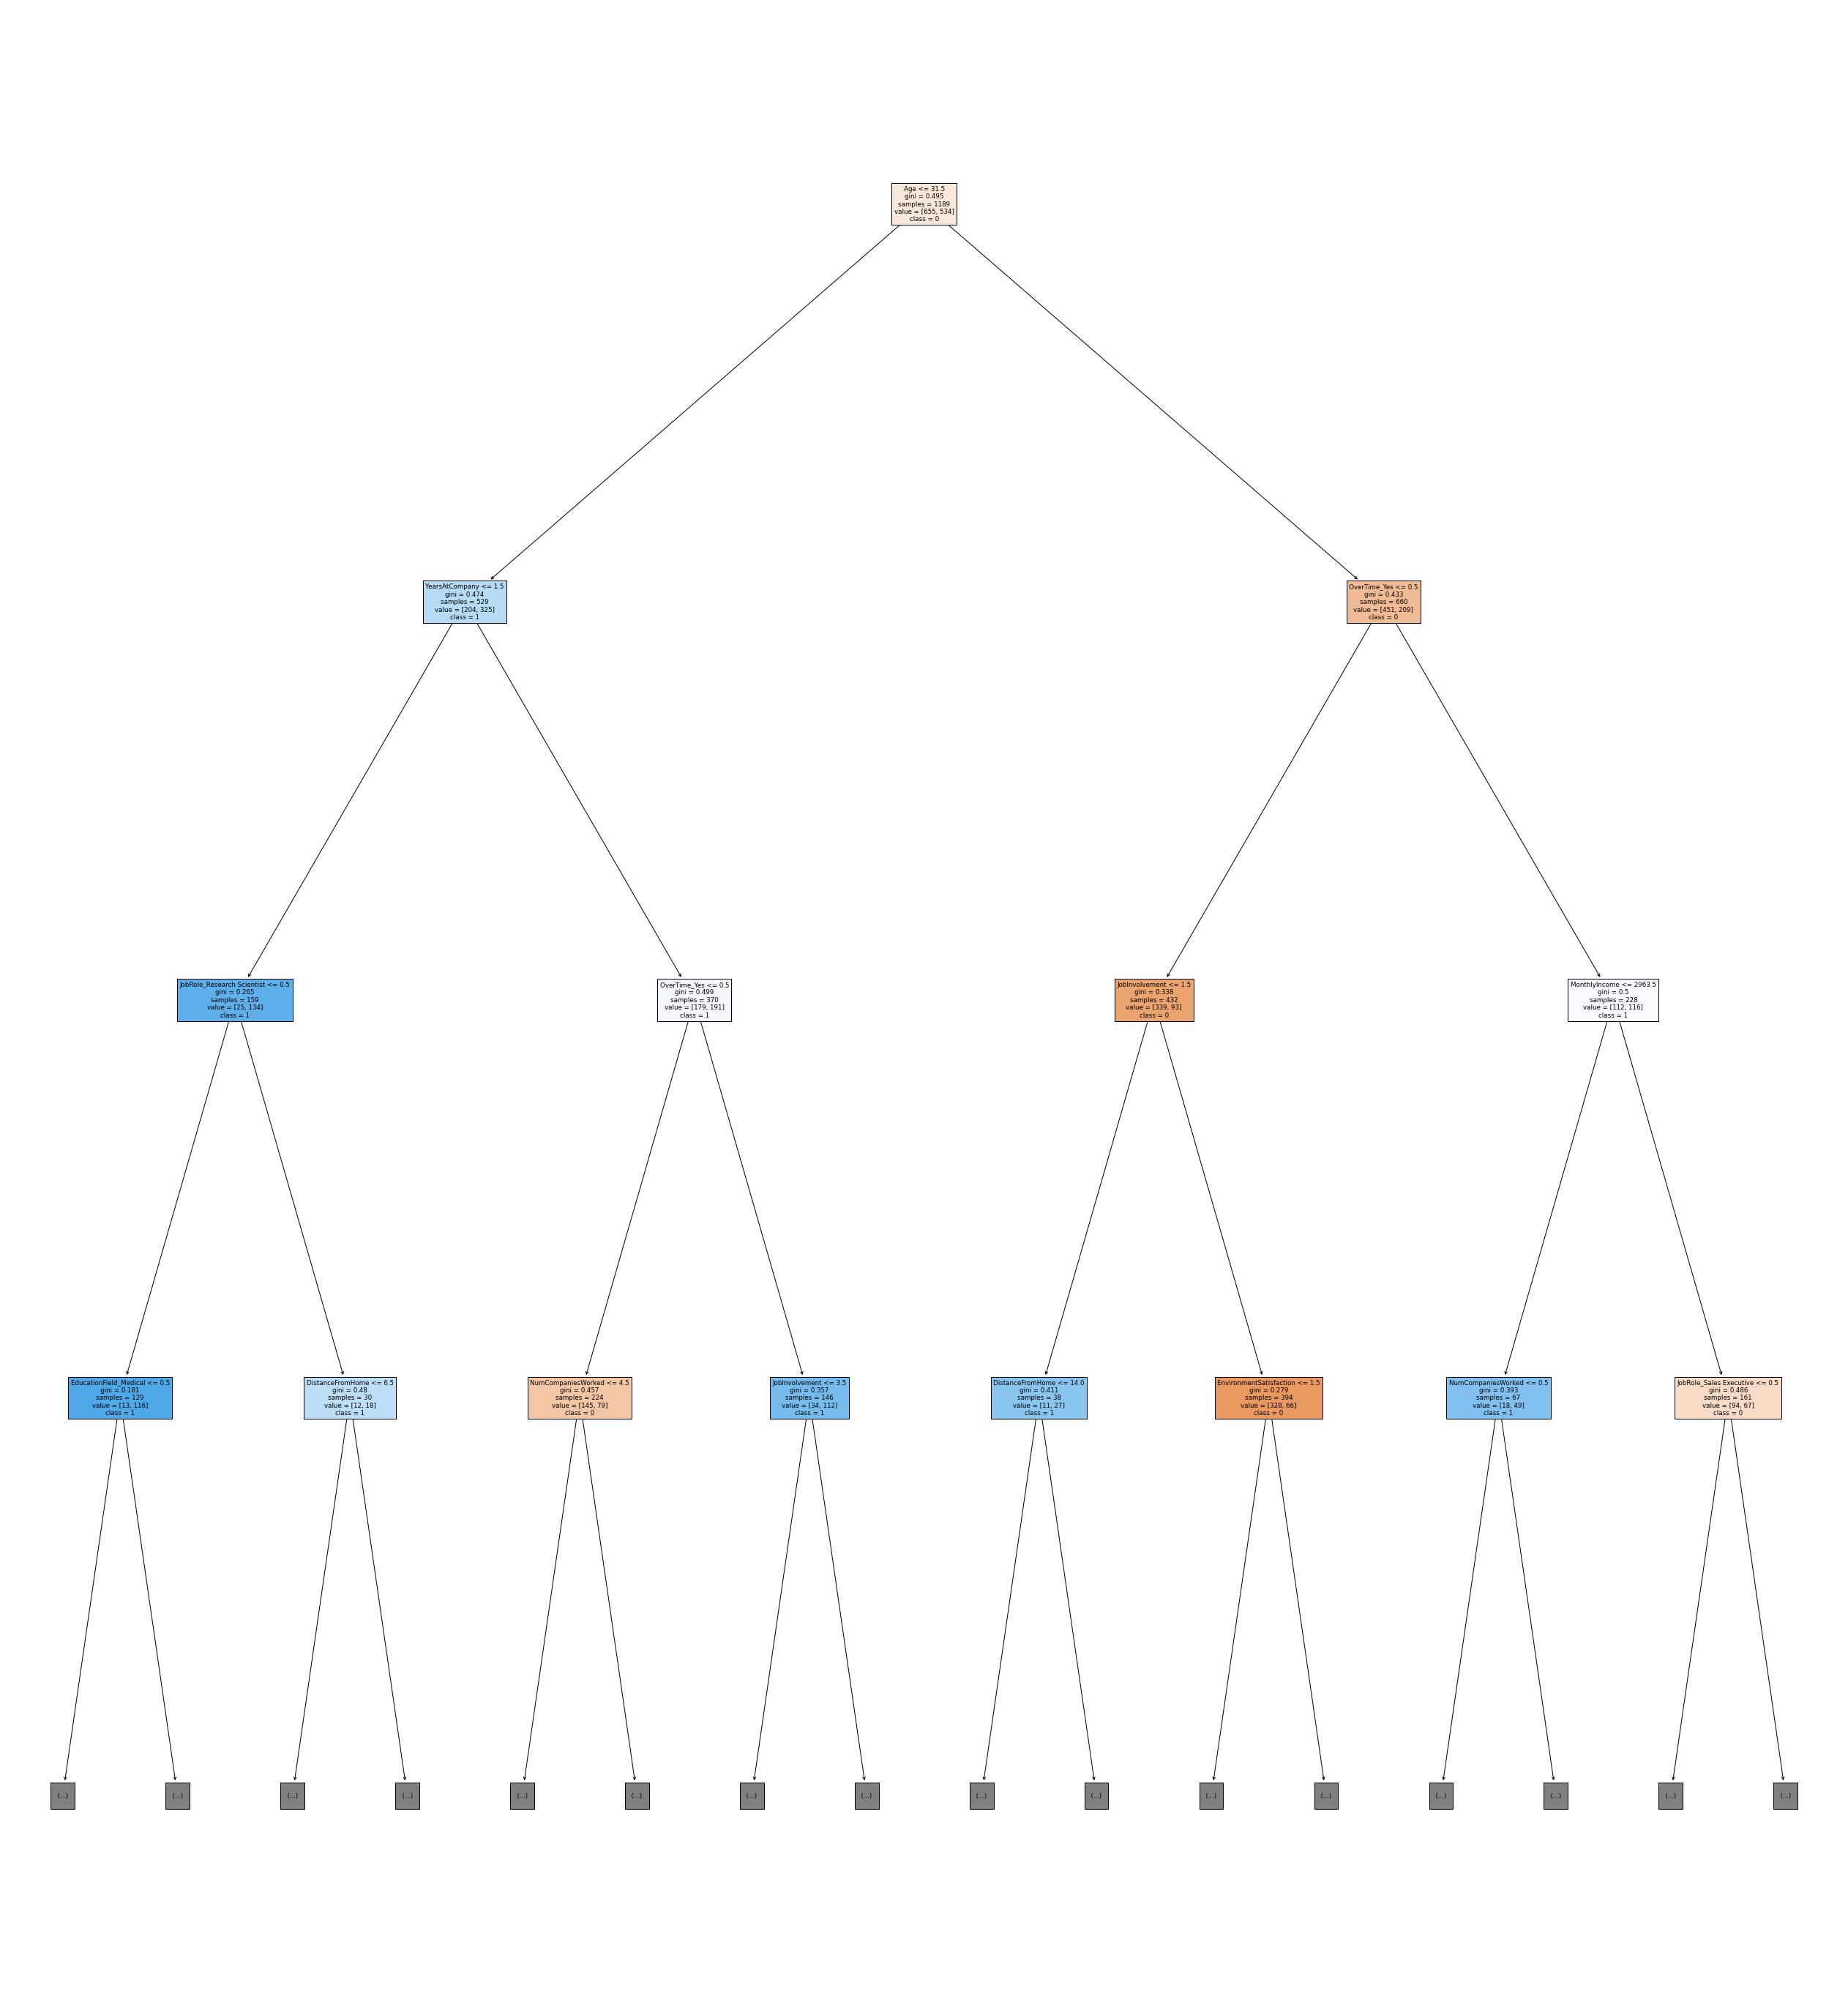

In [226]:
fig = plt.figure(figsize=(45,50))
tree = tree.plot_tree(DT,max_depth=3,
                   feature_names=X_train.columns,  
                   class_names=["0","1"],
                   filled=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a Decision Tree model with the predefined parameters and find the average accuracy by performing the 10 fold cross validation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [376]:
from sklearn.model_selection import cross_val_score
dt_model= DecisionTreeClassifier()
cross_val_score(dt_model,X_train,y_train,cv=10)

array([0.88235294, 0.89915966, 0.89915966, 0.90756303, 0.88235294,
       0.88235294, 0.90756303, 0.89915966, 0.87394958, 0.88983051])

In [ ]:
accuracy_score(y_test,)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. For a decision tree model, find the best value of hyperparameters "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Consider the values as:
        
     criterion = ['entropy', 'gini'],
     max_depth = range(2, 10),
     min_samples_split = range(2,10)

In [269]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [237]:
tuned_param = [{'criterion':['gini','entropy'],'max_depth':np.arange(2,10),'min_samples_split': np.arange(2,10)}]

In [238]:
DT_grid = GridSearchCV(estimator=DT,param_grid=tuned_param,cv =3,n_jobs=-1)

In [239]:
DT_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                          'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])}])

In [241]:
DT_grid.predict(X_test)

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=i

In [242]:
DT_grid.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 2}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a decision tree model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [245]:
DT = DecisionTreeClassifier(criterion= 'entropy', max_depth= 9, min_samples_split= 2)
DT.fit(X_train,y_train)
dt_pred = DT.predict(X_test)
pd.DataFrame(dt_pred).value_counts()

1    150
0    148
dtype: int64

In [251]:
Dt_grid =GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['entropy'],
                          'max_depth': [9],
                          'min_samples_split' : [2]}])

In [252]:
DT_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                          'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])}])

In [257]:
dt_grid_pred = DT_grid.predict(X_test)

In [256]:
from sklearn.metrics import roc_curve

In [258]:
fpr,tpr,thr = roc_curve(y_test,dt_grid_pred)

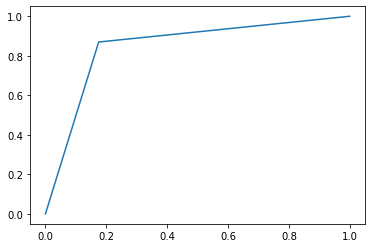

In [259]:
plt.plot(fpr,tpr)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Build 5 decision trees each with 20 random features. Also predict the attrition for test set for each model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [364]:
pred_df = pd.DataFrame(columns = ytrain.columns)
pred_df

,Attrition


In [371]:
i = 1
while i<=5:
    DT = DecisionTreeClassifier(splitter='random',max_features= 5)
    DT.fit(xtrain,ytrain)
    df_pre = pd.DataFrame(DT.predict(xtest),columns = ytrain.columns)
    pred_df = pd.concat([pred_df,df_pre],axis =0,ignore_index=True)
    i+=1

In [372]:
pred_df

,Attrition
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,1
8,1
9,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Create a new dataframe "model_predictions_df" by appending each prediction made in question 8. There will be 5 columns in the dataframe for each prediction using the decision tree models built in above question.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [375]:
model_predictions_df = pd.DataFrame(columns = ['Voted_Result','model_predictions_df','Voted_Result','new_y_pred'])
model_predictions_df

,model_predictions_df,Voted_Result,model_predictions_df,Voted_Result,new_y_pred


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a new column "Voted_Result" in the dataframe "model_predictions_df" that contains the maximum occuring value (mode) of the 5 columns in the dataframe (row-wise).<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Consider the values of "Voted_Result" as our new predictions and store its values in a variable "new_y_pred" and find the accuracy and the roc-auc score using new_y_pred.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# type your code here

<a id="rf"> </a>
## 2. Random Forest

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a random forest full model to predict if an employee will leave the company or not and generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [261]:
x = df_fin.drop('Attrition',axis =1)
y = df[['Attrition']]

In [262]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=100)

In [263]:
from sklearn.ensemble import RandomForestClassifier

In [264]:
RFC = RandomForestClassifier()
RFC.fit(xtrain,ytrain)
rfc_y_pred = RFC.predict(xtest)
pd.DataFrame(rfc_y_pred).value_counts()

0    201
1    171
dtype: int64

In [265]:
print(classification_report(ytest,rfc_y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       204
           1       0.95      0.96      0.96       168

    accuracy                           0.96       372
   macro avg       0.96      0.96      0.96       372
weighted avg       0.96      0.96      0.96       372



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. For a random forest model, find the best value of hyperparameters "n_estimators", "criterion", "max_depth", and "min_samples_split".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

    criterion = ['entropy', 'gini'],
    n_estimators = [90, 100, 150, 200],
    max_depth = [10, 15, 20],
    min_samples_split = [2, 5, 8]

In [284]:
param_grid = {'n_estimators' : [90, 100, 150, 200],
'max_depth' : [10, 15, 20],
'min_samples_split' : [2, 5, 8]}

In [285]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [286]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = param_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [287]:
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [90, 100, 150, 200]},
                   random_state=35, verbose=2)

In [295]:
rf_p = rf_random.predict(xtest)

In [289]:
rf_random.best_params_

{'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 15}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Build a random forest model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [304]:
rf = RandomForestRegressor(n_estimators= 100, min_samples_split= 2, max_depth= 15)

In [305]:
rf.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=15)

In [306]:
rf_hyp_grid =GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'n_estimators': [100], 'min_samples_split': [2], 'max_depth': [15]}])

In [307]:
rf_hyp_grid.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [15], 'min_samples_split': [2],
                          'n_estimators': [100]}])

In [308]:
rf_pred_hyp = rf_hyp_grid.predict(xtest)

In [309]:
roc_auc_score(ytest,rf_pred_hyp)

0.9600840336134455

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Using the tuned random forest model, find the features that impact the model prediction the most.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [315]:
IMP = pd.DataFrame(rf.feature_importances_,index = xtrain.columns,columns =['cf_values'])

In [317]:
IMP.sort_values(by = 'cf_values',ascending=False).head(3)

,cf_values
MonthlyIncome,0.196985
Age,0.140410
YearsAtCompany,0.093359


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Build a random forest model using the top 10 most important features.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [320]:
IMP.sort_values(by = 'cf_values',ascending=False).head(10).index

Index(['MonthlyIncome', 'Age', 'YearsAtCompany', 'DistanceFromHome',
       'OverTime_Yes', 'NumCompaniesWorked', 'PercentSalaryHike',
       'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement'],
      dtype='object')

In [321]:
x = df_fin[['MonthlyIncome', 'Age', 'YearsAtCompany', 'DistanceFromHome',
       'OverTime_Yes', 'NumCompaniesWorked', 'PercentSalaryHike',
       'JobSatisfaction', 'EnvironmentSatisfaction', 'JobInvolvement']]
y = df_fin[['Attrition']]

In [322]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20, random_state=42)

In [323]:
RFC = RandomForestClassifier()
RFC.fit(xtrain,ytrain)
rfc_y_pred = RFC.predict(xtest)
pd.DataFrame(rfc_y_pred).value_counts()

0    159
1    139
dtype: int64

In [324]:
print(classification_report(ytest,rfc_y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       160
           1       0.91      0.92      0.92       138

    accuracy                           0.92       298
   macro avg       0.92      0.92      0.92       298
weighted avg       0.92      0.92      0.92       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Plot a confusion matrix and area under the receiver operating characteristic curve for the model built in question 19. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [326]:
cm = confusion_matrix(ytest,rfc_y_pred)
cm

array([[148,  12],
       [ 11, 127]], dtype=int64)

In [328]:
fpr,tpr,thr = roc_curve(y_test,dt_grid_pred)

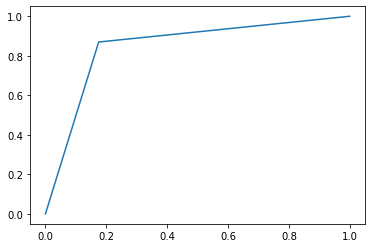

In [329]:
plt.plot(fpr,tpr)